In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline  

In [2]:
df = pd.read_csv('data/pca_df.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object')

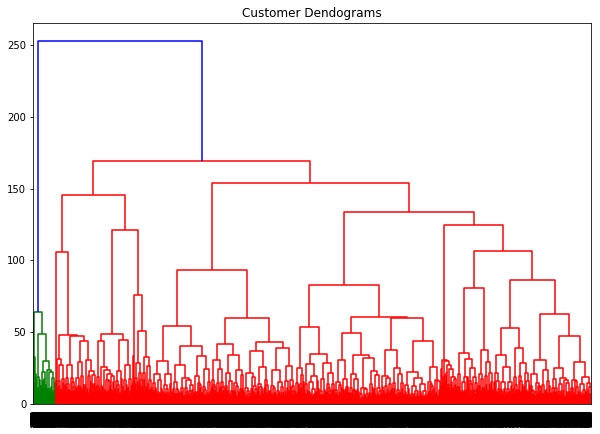

In [4]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')

In [24]:
df.drop(columns=['Unnamed: 0', 'album_id', 'artist', 'artist_name','explicit', 'id','release_date','track_href','track_id', 'track_name', 'track_uri', 'uri'], inplace=True)
df.dropna(inplace=True)

In [25]:
y = df['genre']
X = df.drop(columns=['genre'], axis=1)

In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=3)
assigned_clust = agg_clust.fit_predict(df)

In [ ]:
df

In [ ]:
plt.scatter(df.loudness, df.energy, c=assigned_clust);

In [31]:
from sklearn.cluster import KMeans

In [32]:
k_means = KMeans(n_clusters = 7)
k_means.fit(X)
y_hat = k_means.predict(X)

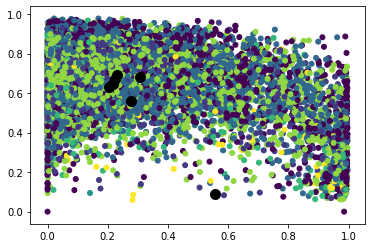

In [35]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y_hat, s = 25)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);